In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pp

C:\Users\haho6\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


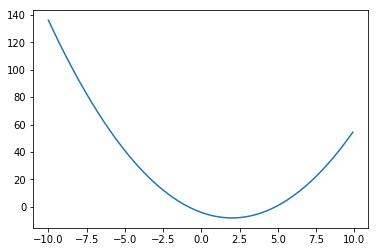

In [27]:
X_ = np.arange(-10,10,0.1)
Y_ = X_ ** 2 - 4 + X_*(-4)
pp.plot(X_,Y_)
pp.show()

In [5]:
data = tf.placeholder('float32', name='XD')
ravel = tf.placeholder('float32', name='YD')
W = tf.Variable(tf.random_uniform([1],-3,3))
b = tf.Variable(tf.random_uniform([1],-3,3))

hypothesis = W * data + b
loss = tf.reduce_mean(tf.square(hypothesis - ravel))

opti = tf.train.AdamOptimizer(learning_rate=0.2)
train_op = opti.minimize(loss)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        _,loss_value = sess.run([train_op, loss],feed_dict={data:X_, ravel:Y_})
        
    X = np.arange(-15,15,1)
    Y = sess.run(hypothesis,feed_dict={data:X})

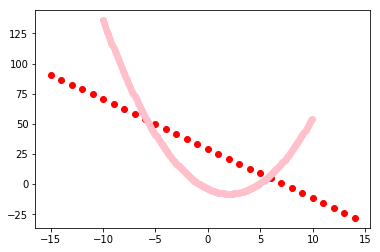

In [20]:
pp.plot(X,Y,'ro')
pp.plot(X_,Y_,'ro',color="pink")
pp.show()

In [23]:
data = tf.placeholder(tf.float32,[None,2])
ravel = tf.placeholder(tf.float32,[None,1])
'''
W1 = tf.Variable(tf.random_normal([1,10]))
Layer1 = tf.nn.relu(tf.matmul( data, W1) )

W2 = tf.Variable(tf.random_normal([10,10]))
Layer2 = tf.nn.relu(tf.matmul( Layer1, W2) )

W3 = tf.Variable(tf.random_normal([10,1]))
hypothesis = tf.matmul(Layer2,W3)
'''

W1 = tf.Variable(tf.random_normal([2, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(data, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 1], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)


'''
loss = tf.reduce_mean(tf.square(model - ravel))

opti = tf.train.AdamOptimizer(learning_rate=0.2).minimize(loss)
'''

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=ravel))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [43]:
print('sd',(X_.reshape(200,1).shape))
#########
# 신경망 모델 구성
######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 1])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 1])

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([110, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 1], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 1

for epoch in range(15):

    # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
    # 지정한 크기만큼 학습할 데이터를 가져옵니다.

    _, cost_val = sess.run([optimizer, cost], feed_dict={X: ([X_.reshape(200,1)]), Y: Y_})

    print('Epoch:', (epoch + 1))

print('최적화 완료!')


sd (200, 1)


ValueError: Dimensions must be equal, but are 1 and 110 for 'MatMul_67' (op: 'MatMul') with input shapes: [?,1], [110,256].

In [24]:
X_ = X_.reshape(-1,2)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        _,loss_value = sess.run([optimizer, cost],feed_dict={data:X_, ravel:Y_[:100]})
    

ValueError: Cannot feed value of shape (100,) for Tensor 'Placeholder_15:0', which has shape '(?, 1)'